## Problem Statement:

    The problem that we are going to solve here is that given a set of features that describe a claimant who is going to claim for the insurance amount, our machine learning model must predict whether the claimant will hire an attorney or not to run the case. To train our machine learning model with insurance data, we will be using [ClaimantsData](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
data.shape

(1340, 7)

In [4]:
##dropping the CASSENUM column
data.drop(['CASENUM'],axis=1,inplace=True)
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [5]:
data.shape

(1340, 6)

In [6]:
#Checking the description
data.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [7]:
#checking for missing values
data.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

#### data['CLMSEX']=data['CLMSEX'].fillna()
#### data['CLMINSUR']=data['CLMINSUR'].fillna()

In [8]:
data.CLMSEX.value_counts().index[0]

1.0

In [9]:
data.CLMSEX.value_counts()

1.0    742
0.0    586
Name: CLMSEX, dtype: int64

In [10]:
data.CLMINSUR.value_counts().index[0]

1.0

In [11]:
# creating a user-defined function for the imputing missing values
#with mode(numerical & categorical data)
##lambda--> lambda argument: expression
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
data.apply(lambda col:fill_na(col))
data.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

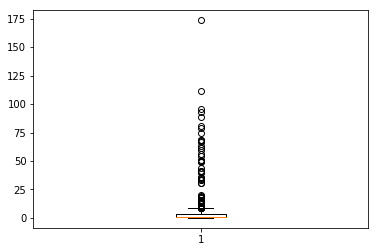

In [12]:
##loss column #Datapoint-->Q
plt.boxplot(data.LOSS)
plt.show()

--> Data Entry mistake

1.Outliers also missing values -->Imputation
2.WINsorization-->Outliers

In [13]:
#split the data into Input and Output
X=data.iloc[:,1:]
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [14]:
#iloc-row indices,column indices
data.iloc[:,1:]#indices of the columns which we need to access

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
5,1.0,1.0,0.0,35.0,0.309
6,0.0,1.0,0.0,9.0,3.538
7,1.0,1.0,0.0,34.0,4.881
8,1.0,1.0,0.0,60.0,0.874
9,0.0,1.0,0.0,10.0,0.350


In [15]:
#split the data into Input and Output
X=data.iloc[:,1:]
y=data.ATTORNEY

In [16]:
#split the data into training and testing
# build the model on training data and check the model performance on test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [17]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#Build the classifier on training data 
#sklearn Library:import,instantiate,fit
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)#Input and Output will be passes to the fit method

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
#Predicting on train data 
#Syntax:objectName.predict(Input)
y_train_pred=reg.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [19]:
y_train==y_train_pred

744      True
363      True
10       True
971      True
634      True
554      True
314      True
419      True
525      True
1043     True
649     False
1308     True
790      True
1284     True
104      True
1097    False
370      True
495      True
1243    False
903     False
125     False
694     False
980      True
1225     True
1253     True
529     False
932      True
1141     True
1036     True
968     False
        ...  
1031     True
141     False
1110    False
753      True
1001    False
1239     True
580      True
562      True
398      True
668      True
252      True
907      True
468      True
914     False
357      True
1278     True
1300    False
1202     True
1305     True
508      True
749      True
129      True
144      True
960      True
847      True
715     False
905     False
1096     True
235     False
1061     True
Name: ATTORNEY, Length: 938, dtype: bool

In [20]:
#Confusion matrix for training data
#Confusion matrix (Actual Values,Predicted values)
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_train,y_train_pred)
conf

array([[315, 170],
       [107, 346]], dtype=int64)

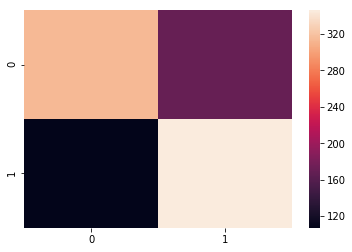

In [21]:
sns.heatmap(conf)

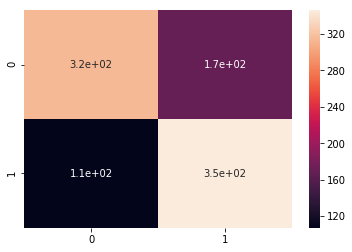

In [22]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True)

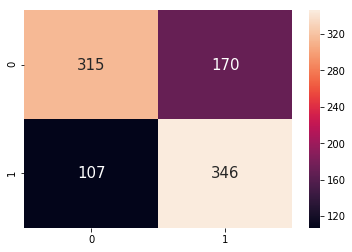

In [23]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f',annot_kws={'size':'15'})

In [24]:
conf

array([[315, 170],
       [107, 346]], dtype=int64)

In [25]:
conf[0][0]

315

In [26]:
#Accessing the values of confusin matrix with row index and column index
print('true_positive=',conf[0][0])
print('false_positive=',conf[0][1])
print('false_negative=',conf[1][0])
print('true_negative=',conf[1][1])


true_positive= 315
false_positive= 170
false_negative= 107
true_negative= 346


1-->Hiring and ATTORNEY
0-->Not Hiring and ATTORNEY
Nuber of false positives

In [27]:
##Accuracry--> TP+TN/TP+FP=TN+FN
(315+345)/(315+170+108+345)

0.7036247334754797

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.7046908315565032

In [29]:
true_positive=conf[0][0]
false_positive=conf[0][1]

In [30]:
## Precission Rate
Precision = true_positive/(true_positive+false_positive)
Precision

0.6494845360824743

In [31]:
#precision
#syntaax:precision_score(actualvalues,predicted values)
from sklearn.metrics import precision_score
precision_score(y_train,y_train_pred)

0.6705426356589147

In [32]:
false_negative=conf[1][0]
true_negative=conf[1][1]

In [33]:
# Out of all the actual values,how many are correctly classifier
Recall=true_positive/(true_positive+false_negative)
Recall

0.7464454976303317

In [34]:
# Calculating f1-score of the model
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred)#f1-score(Actual values,Predicted values)

0.7141382868937047

In [35]:
print('true_positive',conf[0][0])
print('false_positive',conf[0][1])
print('true_negative',conf[1][0])
print('false_negative',conf[1][1])

true_positive 315
false_positive 170
true_negative 107
false_negative 346


In [36]:
#Predicting on train data 
#Confusion matrix for testing data
#Confusion matrix (Actual Values,Predicted values)

In [37]:
# Data preprocessing

In [38]:
from sklearn.metrics import classification_report
#syntax:classification_report(actualvalues,predicted values)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.65      0.69       485
           1       0.67      0.76      0.71       453

   micro avg       0.70      0.70      0.70       938
   macro avg       0.71      0.71      0.70       938
weighted avg       0.71      0.70      0.70       938



In [ ]:
# Prediction on Test Data
# Calculate the metrics for test data--> confusion matrix
# Precision,Recall,F1-Score
# Compare the score with training data